# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [163]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [164]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [165]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [166]:
x_train.shape

(160, 1)

In [167]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


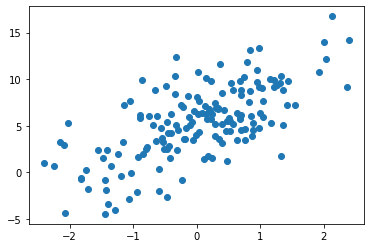

In [168]:
plt.scatter(x_train, y_train)

In [169]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [170]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 100



In [171]:
criterion = torch.nn.MSELoss() 

In [172]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(inputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(inputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 48.33370590209961
h: 2 | epoch: 1, loss: 48.14160919189453
h: 2 | epoch: 2, loss: 47.95043182373047
h: 2 | epoch: 3, loss: 47.7601203918457
h: 2 | epoch: 4, loss: 47.57063674926758
h: 2 | epoch: 5, loss: 47.38193893432617
h: 2 | epoch: 6, loss: 47.1939811706543
h: 2 | epoch: 7, loss: 47.006736755371094
h: 2 | epoch: 8, loss: 46.820167541503906
h: 2 | epoch: 9, loss: 46.63422393798828
h: 2 | epoch: 10, loss: 46.448875427246094
h: 2 | epoch: 11, loss: 46.26409149169922
h: 2 | epoch: 12, loss: 46.0798225402832
h: 2 | epoch: 13, loss: 45.89604949951172
h: 2 | epoch: 14, loss: 45.712730407714844
h: 2 | epoch: 15, loss: 45.52983856201172
h: 2 | epoch: 16, loss: 45.34733200073242
h: 2 | epoch: 17, loss: 45.165184020996094
h: 2 | epoch: 18, loss: 44.98337173461914
h: 2 | epoch: 19, loss: 44.80184555053711
h: 2 | epoch: 20, loss: 44.6205940246582
h: 2 | epoch: 21, loss: 44.439579010009766
h: 2 | epoch: 22, loss: 44.25877380371094
h: 2 | epoch: 23, loss: 44.078147888183594

h: 4 | epoch: 92, loss: 22.598529815673828
h: 4 | epoch: 93, loss: 22.366474151611328
h: 4 | epoch: 94, loss: 22.135639190673828
h: 4 | epoch: 95, loss: 21.90607452392578
h: 4 | epoch: 96, loss: 21.677825927734375
h: 4 | epoch: 97, loss: 21.45094108581543
h: 4 | epoch: 98, loss: 21.225467681884766
h: 4 | epoch: 99, loss: 21.001455307006836
h: 5 | epoch: 0, loss: 46.20867156982422
h: 5 | epoch: 1, loss: 45.68770217895508
h: 5 | epoch: 2, loss: 45.174339294433594
h: 5 | epoch: 3, loss: 44.668235778808594
h: 5 | epoch: 4, loss: 44.1690673828125
h: 5 | epoch: 5, loss: 43.67650604248047
h: 5 | epoch: 6, loss: 43.19026565551758
h: 5 | epoch: 7, loss: 42.71006774902344
h: 5 | epoch: 8, loss: 42.23565673828125
h: 5 | epoch: 9, loss: 41.76677703857422
h: 5 | epoch: 10, loss: 41.303199768066406
h: 5 | epoch: 11, loss: 40.844703674316406
h: 5 | epoch: 12, loss: 40.39108657836914
h: 5 | epoch: 13, loss: 39.942161560058594
h: 5 | epoch: 14, loss: 39.49773406982422
h: 5 | epoch: 15, loss: 39.0576477

h: 7 | epoch: 69, loss: 19.497882843017578
h: 7 | epoch: 70, loss: 19.22287940979004
h: 7 | epoch: 71, loss: 18.9521541595459
h: 7 | epoch: 72, loss: 18.685718536376953
h: 7 | epoch: 73, loss: 18.423595428466797
h: 7 | epoch: 74, loss: 18.16579818725586
h: 7 | epoch: 75, loss: 17.912343978881836
h: 7 | epoch: 76, loss: 17.663238525390625
h: 7 | epoch: 77, loss: 17.41849136352539
h: 7 | epoch: 78, loss: 17.17811393737793
h: 7 | epoch: 79, loss: 16.942100524902344
h: 7 | epoch: 80, loss: 16.710460662841797
h: 7 | epoch: 81, loss: 16.483184814453125
h: 7 | epoch: 82, loss: 16.260272979736328
h: 7 | epoch: 83, loss: 16.041717529296875
h: 7 | epoch: 84, loss: 15.827505111694336
h: 7 | epoch: 85, loss: 15.61762523651123
h: 7 | epoch: 86, loss: 15.41206169128418
h: 7 | epoch: 87, loss: 15.210800170898438
h: 7 | epoch: 88, loss: 15.013813972473145
h: 7 | epoch: 89, loss: 14.821081161499023
h: 7 | epoch: 90, loss: 14.63258171081543
h: 7 | epoch: 91, loss: 14.448280334472656
h: 7 | epoch: 92, lo

h: 10 | epoch: 55, loss: 18.679006576538086
h: 10 | epoch: 56, loss: 18.407123565673828
h: 10 | epoch: 57, loss: 18.140161514282227
h: 10 | epoch: 58, loss: 17.878116607666016
h: 10 | epoch: 59, loss: 17.620975494384766
h: 10 | epoch: 60, loss: 17.368724822998047
h: 10 | epoch: 61, loss: 17.121355056762695
h: 10 | epoch: 62, loss: 16.878841400146484
h: 10 | epoch: 63, loss: 16.641170501708984
h: 10 | epoch: 64, loss: 16.408321380615234
h: 10 | epoch: 65, loss: 16.180265426635742
h: 10 | epoch: 66, loss: 15.956985473632812
h: 10 | epoch: 67, loss: 15.738444328308105
h: 10 | epoch: 68, loss: 15.524620056152344
h: 10 | epoch: 69, loss: 15.315478324890137
h: 10 | epoch: 70, loss: 15.110980033874512
h: 10 | epoch: 71, loss: 14.911092758178711
h: 10 | epoch: 72, loss: 14.715777397155762
h: 10 | epoch: 73, loss: 14.524991989135742
h: 10 | epoch: 74, loss: 14.33869743347168
h: 10 | epoch: 75, loss: 14.156845092773438
h: 10 | epoch: 76, loss: 13.979390144348145
h: 10 | epoch: 77, loss: 13.80628

h: 13 | epoch: 50, loss: 23.933979034423828
h: 13 | epoch: 51, loss: 23.571636199951172
h: 13 | epoch: 52, loss: 23.21474266052246
h: 13 | epoch: 53, loss: 22.86328887939453
h: 13 | epoch: 54, loss: 22.517263412475586
h: 13 | epoch: 55, loss: 22.176651000976562
h: 13 | epoch: 56, loss: 21.84143829345703
h: 13 | epoch: 57, loss: 21.51161766052246
h: 13 | epoch: 58, loss: 21.187179565429688
h: 13 | epoch: 59, loss: 20.86810874938965
h: 13 | epoch: 60, loss: 20.55439567565918
h: 13 | epoch: 61, loss: 20.246030807495117
h: 13 | epoch: 62, loss: 19.9429931640625
h: 13 | epoch: 63, loss: 19.645275115966797
h: 13 | epoch: 64, loss: 19.352863311767578
h: 13 | epoch: 65, loss: 19.065736770629883
h: 13 | epoch: 66, loss: 18.783884048461914
h: 13 | epoch: 67, loss: 18.507278442382812
h: 13 | epoch: 68, loss: 18.23590660095215
h: 13 | epoch: 69, loss: 17.969745635986328
h: 13 | epoch: 70, loss: 17.708770751953125
h: 13 | epoch: 71, loss: 17.452957153320312
h: 13 | epoch: 72, loss: 17.2022781372070

h: 16 | epoch: 17, loss: 37.35768127441406
h: 16 | epoch: 18, loss: 36.82887649536133
h: 16 | epoch: 19, loss: 36.30672073364258
h: 16 | epoch: 20, loss: 35.79104232788086
h: 16 | epoch: 21, loss: 35.28168487548828
h: 16 | epoch: 22, loss: 34.77849578857422
h: 16 | epoch: 23, loss: 34.28134536743164
h: 16 | epoch: 24, loss: 33.79011154174805
h: 16 | epoch: 25, loss: 33.3046760559082
h: 16 | epoch: 26, loss: 32.824947357177734
h: 16 | epoch: 27, loss: 32.350830078125
h: 16 | epoch: 28, loss: 31.882247924804688
h: 16 | epoch: 29, loss: 31.41912269592285
h: 16 | epoch: 30, loss: 30.961400985717773
h: 16 | epoch: 31, loss: 30.509014129638672
h: 16 | epoch: 32, loss: 30.061920166015625
h: 16 | epoch: 33, loss: 29.620071411132812
h: 16 | epoch: 34, loss: 29.183441162109375
h: 16 | epoch: 35, loss: 28.751995086669922
h: 16 | epoch: 36, loss: 28.325708389282227
h: 16 | epoch: 37, loss: 27.904556274414062
h: 16 | epoch: 38, loss: 27.488534927368164
h: 16 | epoch: 39, loss: 27.077625274658203
h:

h: 18 | epoch: 78, loss: 10.624488830566406
h: 18 | epoch: 79, loss: 10.540973663330078
h: 18 | epoch: 80, loss: 10.460638046264648
h: 18 | epoch: 81, loss: 10.383377075195312
h: 18 | epoch: 82, loss: 10.309086799621582
h: 18 | epoch: 83, loss: 10.237662315368652
h: 18 | epoch: 84, loss: 10.169008255004883
h: 18 | epoch: 85, loss: 10.103025436401367
h: 18 | epoch: 86, loss: 10.03962230682373
h: 18 | epoch: 87, loss: 9.978704452514648
h: 18 | epoch: 88, loss: 9.920186042785645
h: 18 | epoch: 89, loss: 9.863980293273926
h: 18 | epoch: 90, loss: 9.810002326965332
h: 18 | epoch: 91, loss: 9.758172035217285
h: 18 | epoch: 92, loss: 9.708410263061523
h: 18 | epoch: 93, loss: 9.660643577575684
h: 18 | epoch: 94, loss: 9.614792823791504
h: 18 | epoch: 95, loss: 9.570789337158203
h: 18 | epoch: 96, loss: 9.528564453125
h: 18 | epoch: 97, loss: 9.48804759979248
h: 18 | epoch: 98, loss: 9.449178695678711
h: 18 | epoch: 99, loss: 9.411890029907227
h: 19 | epoch: 0, loss: 46.50801086425781
h: 19 | 

h: 21 | epoch: 38, loss: 16.07979393005371
h: 21 | epoch: 39, loss: 15.766070365905762
h: 21 | epoch: 40, loss: 15.464035034179688
h: 21 | epoch: 41, loss: 15.173330307006836
h: 21 | epoch: 42, loss: 14.893606185913086
h: 21 | epoch: 43, loss: 14.624521255493164
h: 21 | epoch: 44, loss: 14.365742683410645
h: 21 | epoch: 45, loss: 14.116938591003418
h: 21 | epoch: 46, loss: 13.87779426574707
h: 21 | epoch: 47, loss: 13.647994995117188
h: 21 | epoch: 48, loss: 13.427233695983887
h: 21 | epoch: 49, loss: 13.21521282196045
h: 21 | epoch: 50, loss: 13.011642456054688
h: 21 | epoch: 51, loss: 12.81623649597168
h: 21 | epoch: 52, loss: 12.628717422485352
h: 21 | epoch: 53, loss: 12.448808670043945
h: 21 | epoch: 54, loss: 12.276253700256348
h: 21 | epoch: 55, loss: 12.110788345336914
h: 21 | epoch: 56, loss: 11.952166557312012
h: 21 | epoch: 57, loss: 11.800138473510742
h: 21 | epoch: 58, loss: 11.65446949005127
h: 21 | epoch: 59, loss: 11.514925003051758
h: 21 | epoch: 60, loss: 11.381277084

h: 24 | epoch: 5, loss: 39.992286682128906
h: 24 | epoch: 6, loss: 38.3772087097168
h: 24 | epoch: 7, loss: 36.8455696105957
h: 24 | epoch: 8, loss: 35.39244842529297
h: 24 | epoch: 9, loss: 34.013336181640625
h: 24 | epoch: 10, loss: 32.70406723022461
h: 24 | epoch: 11, loss: 31.460790634155273
h: 24 | epoch: 12, loss: 30.27992820739746
h: 24 | epoch: 13, loss: 29.158157348632812
h: 24 | epoch: 14, loss: 28.092395782470703
h: 24 | epoch: 15, loss: 27.079748153686523
h: 24 | epoch: 16, loss: 26.117511749267578
h: 24 | epoch: 17, loss: 25.20315170288086
h: 24 | epoch: 18, loss: 24.334291458129883
h: 24 | epoch: 19, loss: 23.50868034362793
h: 24 | epoch: 20, loss: 22.72421646118164
h: 24 | epoch: 21, loss: 21.97889518737793
h: 24 | epoch: 22, loss: 21.270832061767578
h: 24 | epoch: 23, loss: 20.598236083984375
h: 24 | epoch: 24, loss: 19.95941734313965
h: 24 | epoch: 25, loss: 19.352758407592773
h: 24 | epoch: 26, loss: 18.7767333984375
h: 24 | epoch: 27, loss: 18.229883193969727
h: 24 |

h: 26 | epoch: 89, loss: 8.732219696044922
h: 26 | epoch: 90, loss: 8.720441818237305
h: 26 | epoch: 91, loss: 8.709409713745117
h: 26 | epoch: 92, loss: 8.69908332824707
h: 26 | epoch: 93, loss: 8.689414024353027
h: 26 | epoch: 94, loss: 8.680363655090332
h: 26 | epoch: 95, loss: 8.671892166137695
h: 26 | epoch: 96, loss: 8.663963317871094
h: 26 | epoch: 97, loss: 8.65654182434082
h: 26 | epoch: 98, loss: 8.649599075317383
h: 26 | epoch: 99, loss: 8.64310073852539
h: 27 | epoch: 0, loss: 39.46112060546875
h: 27 | epoch: 1, loss: 38.05182647705078
h: 27 | epoch: 2, loss: 36.705284118652344
h: 27 | epoch: 3, loss: 35.41827392578125
h: 27 | epoch: 4, loss: 34.18782043457031
h: 27 | epoch: 5, loss: 33.011165618896484
h: 27 | epoch: 6, loss: 31.885746002197266
h: 27 | epoch: 7, loss: 30.80916976928711
h: 27 | epoch: 8, loss: 29.77920913696289
h: 27 | epoch: 9, loss: 28.793773651123047
h: 27 | epoch: 10, loss: 27.850902557373047
h: 27 | epoch: 11, loss: 26.948755264282227
h: 27 | epoch: 12,

h: 29 | epoch: 78, loss: 9.216238975524902
h: 29 | epoch: 79, loss: 9.178364753723145
h: 29 | epoch: 80, loss: 9.142568588256836
h: 29 | epoch: 81, loss: 9.108739852905273
h: 29 | epoch: 82, loss: 9.07677936553955
h: 29 | epoch: 83, loss: 9.046586990356445
h: 29 | epoch: 84, loss: 9.018072128295898
h: 29 | epoch: 85, loss: 8.991144180297852
h: 29 | epoch: 86, loss: 8.965719223022461
h: 29 | epoch: 87, loss: 8.941718101501465
h: 29 | epoch: 88, loss: 8.919062614440918
h: 29 | epoch: 89, loss: 8.897684097290039
h: 29 | epoch: 90, loss: 8.877509117126465
h: 29 | epoch: 91, loss: 8.858475685119629
h: 29 | epoch: 92, loss: 8.840519905090332
h: 29 | epoch: 93, loss: 8.823585510253906
h: 29 | epoch: 94, loss: 8.807613372802734
h: 29 | epoch: 95, loss: 8.792552947998047
h: 29 | epoch: 96, loss: 8.778352737426758
h: 29 | epoch: 97, loss: 8.764966011047363
h: 29 | epoch: 98, loss: 8.752347946166992
h: 29 | epoch: 99, loss: 8.740453720092773
h: 30 | epoch: 0, loss: 44.18837356567383
h: 30 | epoch

h: 32 | epoch: 67, loss: 9.986699104309082
h: 32 | epoch: 68, loss: 9.905035018920898
h: 32 | epoch: 69, loss: 9.827791213989258
h: 32 | epoch: 70, loss: 9.75474739074707
h: 32 | epoch: 71, loss: 9.685688018798828
h: 32 | epoch: 72, loss: 9.620415687561035
h: 32 | epoch: 73, loss: 9.558732986450195
h: 32 | epoch: 74, loss: 9.500456809997559
h: 32 | epoch: 75, loss: 9.445413589477539
h: 32 | epoch: 76, loss: 9.393430709838867
h: 32 | epoch: 77, loss: 9.344350814819336
h: 32 | epoch: 78, loss: 9.298022270202637
h: 32 | epoch: 79, loss: 9.254297256469727
h: 32 | epoch: 80, loss: 9.21303939819336
h: 32 | epoch: 81, loss: 9.174116134643555
h: 32 | epoch: 82, loss: 9.13740348815918
h: 32 | epoch: 83, loss: 9.102778434753418
h: 32 | epoch: 84, loss: 9.070131301879883
h: 32 | epoch: 85, loss: 9.03935432434082
h: 32 | epoch: 86, loss: 9.010346412658691
h: 32 | epoch: 87, loss: 8.983006477355957
h: 32 | epoch: 88, loss: 8.957244873046875
h: 32 | epoch: 89, loss: 8.932974815368652
h: 32 | epoch: 

h: 35 | epoch: 54, loss: 10.679376602172852
h: 35 | epoch: 55, loss: 10.55762767791748
h: 35 | epoch: 56, loss: 10.44249439239502
h: 35 | epoch: 57, loss: 10.333641052246094
h: 35 | epoch: 58, loss: 10.230755805969238
h: 35 | epoch: 59, loss: 10.133535385131836
h: 35 | epoch: 60, loss: 10.041688919067383
h: 35 | epoch: 61, loss: 9.954941749572754
h: 35 | epoch: 62, loss: 9.873030662536621
h: 35 | epoch: 63, loss: 9.795702934265137
h: 35 | epoch: 64, loss: 9.722722053527832
h: 35 | epoch: 65, loss: 9.653854370117188
h: 35 | epoch: 66, loss: 9.588885307312012
h: 35 | epoch: 67, loss: 9.527605056762695
h: 35 | epoch: 68, loss: 9.469820022583008
h: 35 | epoch: 69, loss: 9.415334701538086
h: 35 | epoch: 70, loss: 9.363977432250977
h: 35 | epoch: 71, loss: 9.315576553344727
h: 35 | epoch: 72, loss: 9.269968032836914
h: 35 | epoch: 73, loss: 9.226999282836914
h: 35 | epoch: 74, loss: 9.186525344848633
h: 35 | epoch: 75, loss: 9.148406982421875
h: 35 | epoch: 76, loss: 9.112513542175293
h: 35 

h: 38 | epoch: 51, loss: 12.483302116394043
h: 38 | epoch: 52, loss: 12.301676750183105
h: 38 | epoch: 53, loss: 12.127774238586426
h: 38 | epoch: 54, loss: 11.961307525634766
h: 38 | epoch: 55, loss: 11.801996231079102
h: 38 | epoch: 56, loss: 11.649566650390625
h: 38 | epoch: 57, loss: 11.50376033782959
h: 38 | epoch: 58, loss: 11.364316940307617
h: 38 | epoch: 59, loss: 11.230993270874023
h: 38 | epoch: 60, loss: 11.10354995727539
h: 38 | epoch: 61, loss: 10.981752395629883
h: 38 | epoch: 62, loss: 10.865381240844727
h: 38 | epoch: 63, loss: 10.754217147827148
h: 38 | epoch: 64, loss: 10.648050308227539
h: 38 | epoch: 65, loss: 10.546680450439453
h: 38 | epoch: 66, loss: 10.449910163879395
h: 38 | epoch: 67, loss: 10.357549667358398
h: 38 | epoch: 68, loss: 10.26941967010498
h: 38 | epoch: 69, loss: 10.185342788696289
h: 38 | epoch: 70, loss: 10.105149269104004
h: 38 | epoch: 71, loss: 10.02867317199707
h: 38 | epoch: 72, loss: 9.955759048461914
h: 38 | epoch: 73, loss: 9.8862543106

h: 41 | epoch: 40, loss: 11.187453269958496
h: 41 | epoch: 41, loss: 11.004972457885742
h: 41 | epoch: 42, loss: 10.834660530090332
h: 41 | epoch: 43, loss: 10.675750732421875
h: 41 | epoch: 44, loss: 10.527522087097168
h: 41 | epoch: 45, loss: 10.389290809631348
h: 41 | epoch: 46, loss: 10.260416030883789
h: 41 | epoch: 47, loss: 10.140294075012207
h: 41 | epoch: 48, loss: 10.028360366821289
h: 41 | epoch: 49, loss: 9.924077987670898
h: 41 | epoch: 50, loss: 9.826951026916504
h: 41 | epoch: 51, loss: 9.736506462097168
h: 41 | epoch: 52, loss: 9.652305603027344
h: 41 | epoch: 53, loss: 9.573930740356445
h: 41 | epoch: 54, loss: 9.500997543334961
h: 41 | epoch: 55, loss: 9.433140754699707
h: 41 | epoch: 56, loss: 9.370018005371094
h: 41 | epoch: 57, loss: 9.311311721801758
h: 41 | epoch: 58, loss: 9.25672435760498
h: 41 | epoch: 59, loss: 9.205972671508789
h: 41 | epoch: 60, loss: 9.158798217773438
h: 41 | epoch: 61, loss: 9.114953994750977
h: 41 | epoch: 62, loss: 9.074213027954102
h: 

h: 44 | epoch: 61, loss: 8.734882354736328
h: 44 | epoch: 62, loss: 8.72004222869873
h: 44 | epoch: 63, loss: 8.706439971923828
h: 44 | epoch: 64, loss: 8.693971633911133
h: 44 | epoch: 65, loss: 8.682536125183105
h: 44 | epoch: 66, loss: 8.672046661376953
h: 44 | epoch: 67, loss: 8.662424087524414
h: 44 | epoch: 68, loss: 8.653592109680176
h: 44 | epoch: 69, loss: 8.645483016967773
h: 44 | epoch: 70, loss: 8.638038635253906
h: 44 | epoch: 71, loss: 8.631200790405273
h: 44 | epoch: 72, loss: 8.624917030334473
h: 44 | epoch: 73, loss: 8.619141578674316
h: 44 | epoch: 74, loss: 8.613832473754883
h: 44 | epoch: 75, loss: 8.60894775390625
h: 44 | epoch: 76, loss: 8.604455947875977
h: 44 | epoch: 77, loss: 8.600320816040039
h: 44 | epoch: 78, loss: 8.596514701843262
h: 44 | epoch: 79, loss: 8.593008995056152
h: 44 | epoch: 80, loss: 8.589780807495117
h: 44 | epoch: 81, loss: 8.586804389953613
h: 44 | epoch: 82, loss: 8.584060668945312
h: 44 | epoch: 83, loss: 8.581530570983887
h: 44 | epoch

h: 47 | epoch: 19, loss: 15.435091972351074
h: 47 | epoch: 20, loss: 14.826518058776855
h: 47 | epoch: 21, loss: 14.271615982055664
h: 47 | epoch: 22, loss: 13.765739440917969
h: 47 | epoch: 23, loss: 13.30462646484375
h: 47 | epoch: 24, loss: 12.884376525878906
h: 47 | epoch: 25, loss: 12.501424789428711
h: 47 | epoch: 26, loss: 12.152506828308105
h: 47 | epoch: 27, loss: 11.834634780883789
h: 47 | epoch: 28, loss: 11.545075416564941
h: 47 | epoch: 29, loss: 11.281333923339844
h: 47 | epoch: 30, loss: 11.04112434387207
h: 47 | epoch: 31, loss: 10.822361946105957
h: 47 | epoch: 32, loss: 10.623141288757324
h: 47 | epoch: 33, loss: 10.441720962524414
h: 47 | epoch: 34, loss: 10.276514053344727
h: 47 | epoch: 35, loss: 10.126069068908691
h: 47 | epoch: 36, loss: 9.989062309265137
h: 47 | epoch: 37, loss: 9.86429214477539
h: 47 | epoch: 38, loss: 9.750657081604004
h: 47 | epoch: 39, loss: 9.64715576171875
h: 47 | epoch: 40, loss: 9.552873611450195
h: 47 | epoch: 41, loss: 9.46698093414306

h: 49 | epoch: 94, loss: 8.554241180419922
h: 49 | epoch: 95, loss: 8.55392074584961
h: 49 | epoch: 96, loss: 8.55362319946289
h: 49 | epoch: 97, loss: 8.553346633911133
h: 49 | epoch: 98, loss: 8.553091049194336
h: 49 | epoch: 99, loss: 8.552852630615234
h: 50 | epoch: 0, loss: 45.3249626159668
h: 50 | epoch: 1, loss: 42.39110565185547
h: 50 | epoch: 2, loss: 39.694026947021484
h: 50 | epoch: 3, loss: 37.21317672729492
h: 50 | epoch: 4, loss: 34.93014907836914
h: 50 | epoch: 5, loss: 32.82836151123047
h: 50 | epoch: 6, loss: 30.892873764038086
h: 50 | epoch: 7, loss: 29.11012840270996
h: 50 | epoch: 8, loss: 27.467838287353516
h: 50 | epoch: 9, loss: 25.95479393005371
h: 50 | epoch: 10, loss: 24.560779571533203
h: 50 | epoch: 11, loss: 23.276439666748047
h: 50 | epoch: 12, loss: 22.09320831298828
h: 50 | epoch: 13, loss: 21.003215789794922
h: 50 | epoch: 14, loss: 19.999229431152344
h: 50 | epoch: 15, loss: 19.07459259033203
h: 50 | epoch: 16, loss: 18.223175048828125
h: 50 | epoch: 1

h: 52 | epoch: 75, loss: 8.731866836547852
h: 52 | epoch: 76, loss: 8.718267440795898
h: 52 | epoch: 77, loss: 8.705671310424805
h: 52 | epoch: 78, loss: 8.694005966186523
h: 52 | epoch: 79, loss: 8.683202743530273
h: 52 | epoch: 80, loss: 8.673199653625488
h: 52 | epoch: 81, loss: 8.663938522338867
h: 52 | epoch: 82, loss: 8.655363082885742
h: 52 | epoch: 83, loss: 8.647425651550293
h: 52 | epoch: 84, loss: 8.640079498291016
h: 52 | epoch: 85, loss: 8.633279800415039
h: 52 | epoch: 86, loss: 8.626986503601074
h: 52 | epoch: 87, loss: 8.621163368225098
h: 52 | epoch: 88, loss: 8.615776062011719
h: 52 | epoch: 89, loss: 8.61078929901123
h: 52 | epoch: 90, loss: 8.606176376342773
h: 52 | epoch: 91, loss: 8.601908683776855
h: 52 | epoch: 92, loss: 8.597962379455566
h: 52 | epoch: 93, loss: 8.594308853149414
h: 52 | epoch: 94, loss: 8.590932846069336
h: 52 | epoch: 95, loss: 8.587807655334473
h: 52 | epoch: 96, loss: 8.584918022155762
h: 52 | epoch: 97, loss: 8.582246780395508
h: 52 | epoc

h: 55 | epoch: 72, loss: 8.666876792907715
h: 55 | epoch: 73, loss: 8.657526969909668
h: 55 | epoch: 74, loss: 8.648920059204102
h: 55 | epoch: 75, loss: 8.640995979309082
h: 55 | epoch: 76, loss: 8.633702278137207
h: 55 | epoch: 77, loss: 8.62698745727539
h: 55 | epoch: 78, loss: 8.620807647705078
h: 55 | epoch: 79, loss: 8.615118980407715
h: 55 | epoch: 80, loss: 8.609883308410645
h: 55 | epoch: 81, loss: 8.605066299438477
h: 55 | epoch: 82, loss: 8.600631713867188
h: 55 | epoch: 83, loss: 8.596549987792969
h: 55 | epoch: 84, loss: 8.592795372009277
h: 55 | epoch: 85, loss: 8.589338302612305
h: 55 | epoch: 86, loss: 8.586160659790039
h: 55 | epoch: 87, loss: 8.583233833312988
h: 55 | epoch: 88, loss: 8.580541610717773
h: 55 | epoch: 89, loss: 8.578064918518066
h: 55 | epoch: 90, loss: 8.575784683227539
h: 55 | epoch: 91, loss: 8.573688507080078
h: 55 | epoch: 92, loss: 8.571759223937988
h: 55 | epoch: 93, loss: 8.569984436035156
h: 55 | epoch: 94, loss: 8.568350791931152
h: 55 | epoc

h: 58 | epoch: 84, loss: 8.555818557739258
h: 58 | epoch: 85, loss: 8.555196762084961
h: 58 | epoch: 86, loss: 8.554637908935547
h: 58 | epoch: 87, loss: 8.554136276245117
h: 58 | epoch: 88, loss: 8.553682327270508
h: 58 | epoch: 89, loss: 8.553276062011719
h: 58 | epoch: 90, loss: 8.552909851074219
h: 58 | epoch: 91, loss: 8.552580833435059
h: 58 | epoch: 92, loss: 8.552284240722656
h: 58 | epoch: 93, loss: 8.552016258239746
h: 58 | epoch: 94, loss: 8.551775932312012
h: 58 | epoch: 95, loss: 8.55156135559082
h: 58 | epoch: 96, loss: 8.55136489868164
h: 58 | epoch: 97, loss: 8.551191329956055
h: 58 | epoch: 98, loss: 8.551032066345215
h: 58 | epoch: 99, loss: 8.55088996887207
h: 59 | epoch: 0, loss: 44.11098861694336
h: 59 | epoch: 1, loss: 41.925621032714844
h: 59 | epoch: 2, loss: 39.883399963378906
h: 59 | epoch: 3, loss: 37.973209381103516
h: 59 | epoch: 4, loss: 36.185035705566406
h: 59 | epoch: 5, loss: 34.509864807128906
h: 59 | epoch: 6, loss: 32.93949508666992
h: 59 | epoch: 7

h: 61 | epoch: 62, loss: 8.613614082336426
h: 61 | epoch: 63, loss: 8.608663558959961
h: 61 | epoch: 64, loss: 8.604119300842285
h: 61 | epoch: 65, loss: 8.599946975708008
h: 61 | epoch: 66, loss: 8.596113204956055
h: 61 | epoch: 67, loss: 8.592588424682617
h: 61 | epoch: 68, loss: 8.589345932006836
h: 61 | epoch: 69, loss: 8.586359024047852
h: 61 | epoch: 70, loss: 8.583610534667969
h: 61 | epoch: 71, loss: 8.581077575683594
h: 61 | epoch: 72, loss: 8.578742027282715
h: 61 | epoch: 73, loss: 8.576587677001953
h: 61 | epoch: 74, loss: 8.574599266052246
h: 61 | epoch: 75, loss: 8.572762489318848
h: 61 | epoch: 76, loss: 8.571066856384277
h: 61 | epoch: 77, loss: 8.569500923156738
h: 61 | epoch: 78, loss: 8.568053245544434
h: 61 | epoch: 79, loss: 8.566713333129883
h: 61 | epoch: 80, loss: 8.565473556518555
h: 61 | epoch: 81, loss: 8.56432819366455
h: 61 | epoch: 82, loss: 8.563265800476074
h: 61 | epoch: 83, loss: 8.562284469604492
h: 61 | epoch: 84, loss: 8.561373710632324
h: 61 | epoc

h: 64 | epoch: 20, loss: 13.081318855285645
h: 64 | epoch: 21, loss: 12.664365768432617
h: 64 | epoch: 22, loss: 12.284764289855957
h: 64 | epoch: 23, loss: 11.939287185668945
h: 64 | epoch: 24, loss: 11.624971389770508
h: 64 | epoch: 25, loss: 11.33910083770752
h: 64 | epoch: 26, loss: 11.079188346862793
h: 64 | epoch: 27, loss: 10.842951774597168
h: 64 | epoch: 28, loss: 10.628301620483398
h: 64 | epoch: 29, loss: 10.433321952819824
h: 64 | epoch: 30, loss: 10.256266593933105
h: 64 | epoch: 31, loss: 10.09553337097168
h: 64 | epoch: 32, loss: 9.94965934753418
h: 64 | epoch: 33, loss: 9.817304611206055
h: 64 | epoch: 34, loss: 9.697251319885254
h: 64 | epoch: 35, loss: 9.588379859924316
h: 64 | epoch: 36, loss: 9.489677429199219
h: 64 | epoch: 37, loss: 9.400211334228516
h: 64 | epoch: 38, loss: 9.319138526916504
h: 64 | epoch: 39, loss: 9.245687484741211
h: 64 | epoch: 40, loss: 9.179155349731445
h: 64 | epoch: 41, loss: 9.118903160095215
h: 64 | epoch: 42, loss: 9.064348220825195
h:

h: 66 | epoch: 76, loss: 8.605859756469727
h: 66 | epoch: 77, loss: 8.60129451751709
h: 66 | epoch: 78, loss: 8.597101211547852
h: 66 | epoch: 79, loss: 8.593249320983887
h: 66 | epoch: 80, loss: 8.58971118927002
h: 66 | epoch: 81, loss: 8.586461067199707
h: 66 | epoch: 82, loss: 8.583473205566406
h: 66 | epoch: 83, loss: 8.580731391906738
h: 66 | epoch: 84, loss: 8.578210830688477
h: 66 | epoch: 85, loss: 8.575895309448242
h: 66 | epoch: 86, loss: 8.573766708374023
h: 66 | epoch: 87, loss: 8.571812629699707
h: 66 | epoch: 88, loss: 8.570016860961914
h: 66 | epoch: 89, loss: 8.568365097045898
h: 66 | epoch: 90, loss: 8.566848754882812
h: 66 | epoch: 91, loss: 8.565454483032227
h: 66 | epoch: 92, loss: 8.564172744750977
h: 66 | epoch: 93, loss: 8.562995910644531
h: 66 | epoch: 94, loss: 8.561914443969727
h: 66 | epoch: 95, loss: 8.560920715332031
h: 66 | epoch: 96, loss: 8.560006141662598
h: 66 | epoch: 97, loss: 8.559165954589844
h: 66 | epoch: 98, loss: 8.558393478393555
h: 66 | epoch

h: 69 | epoch: 48, loss: 8.614460945129395
h: 69 | epoch: 49, loss: 8.6063814163208
h: 69 | epoch: 50, loss: 8.599322319030762
h: 69 | epoch: 51, loss: 8.593154907226562
h: 69 | epoch: 52, loss: 8.58776569366455
h: 69 | epoch: 53, loss: 8.583053588867188
h: 69 | epoch: 54, loss: 8.578932762145996
h: 69 | epoch: 55, loss: 8.575329780578613
h: 69 | epoch: 56, loss: 8.572175979614258
h: 69 | epoch: 57, loss: 8.569416046142578
h: 69 | epoch: 58, loss: 8.567000389099121
h: 69 | epoch: 59, loss: 8.564886093139648
h: 69 | epoch: 60, loss: 8.563033103942871
h: 69 | epoch: 61, loss: 8.561408996582031
h: 69 | epoch: 62, loss: 8.559985160827637
h: 69 | epoch: 63, loss: 8.558737754821777
h: 69 | epoch: 64, loss: 8.557642936706543
h: 69 | epoch: 65, loss: 8.556683540344238
h: 69 | epoch: 66, loss: 8.555839538574219
h: 69 | epoch: 67, loss: 8.555097579956055
h: 69 | epoch: 68, loss: 8.554449081420898
h: 69 | epoch: 69, loss: 8.553876876831055
h: 69 | epoch: 70, loss: 8.553373336791992
h: 69 | epoch:

h: 72 | epoch: 30, loss: 12.376736640930176
h: 72 | epoch: 31, loss: 12.079560279846191
h: 72 | epoch: 32, loss: 11.804803848266602
h: 72 | epoch: 33, loss: 11.5508451461792
h: 72 | epoch: 34, loss: 11.316168785095215
h: 72 | epoch: 35, loss: 11.09936809539795
h: 72 | epoch: 36, loss: 10.899129867553711
h: 72 | epoch: 37, loss: 10.714232444763184
h: 72 | epoch: 38, loss: 10.543543815612793
h: 72 | epoch: 39, loss: 10.386007308959961
h: 72 | epoch: 40, loss: 10.240644454956055
h: 72 | epoch: 41, loss: 10.106544494628906
h: 72 | epoch: 42, loss: 9.98286247253418
h: 72 | epoch: 43, loss: 9.868810653686523
h: 72 | epoch: 44, loss: 9.763662338256836
h: 72 | epoch: 45, loss: 9.666742324829102
h: 72 | epoch: 46, loss: 9.577424049377441
h: 72 | epoch: 47, loss: 9.495126724243164
h: 72 | epoch: 48, loss: 9.419312477111816
h: 72 | epoch: 49, loss: 9.349482536315918
h: 72 | epoch: 50, loss: 9.285176277160645
h: 72 | epoch: 51, loss: 9.22596549987793
h: 72 | epoch: 52, loss: 9.171455383300781
h: 7

h: 75 | epoch: 69, loss: 8.572287559509277
h: 75 | epoch: 70, loss: 8.570056915283203
h: 75 | epoch: 71, loss: 8.5680513381958
h: 75 | epoch: 72, loss: 8.566244125366211
h: 75 | epoch: 73, loss: 8.56462287902832
h: 75 | epoch: 74, loss: 8.563161849975586
h: 75 | epoch: 75, loss: 8.561845779418945
h: 75 | epoch: 76, loss: 8.560661315917969
h: 75 | epoch: 77, loss: 8.559593200683594
h: 75 | epoch: 78, loss: 8.55863094329834
h: 75 | epoch: 79, loss: 8.557764053344727
h: 75 | epoch: 80, loss: 8.556982040405273
h: 75 | epoch: 81, loss: 8.55627727508545
h: 75 | epoch: 82, loss: 8.555642127990723
h: 75 | epoch: 83, loss: 8.55506706237793
h: 75 | epoch: 84, loss: 8.554548263549805
h: 75 | epoch: 85, loss: 8.554080963134766
h: 75 | epoch: 86, loss: 8.553657531738281
h: 75 | epoch: 87, loss: 8.553275108337402
h: 75 | epoch: 88, loss: 8.55293083190918
h: 75 | epoch: 89, loss: 8.552618026733398
h: 75 | epoch: 90, loss: 8.552335739135742
h: 75 | epoch: 91, loss: 8.552079200744629
h: 75 | epoch: 92,

h: 78 | epoch: 54, loss: 8.628686904907227
h: 78 | epoch: 55, loss: 8.620013236999512
h: 78 | epoch: 56, loss: 8.612292289733887
h: 78 | epoch: 57, loss: 8.60542106628418
h: 78 | epoch: 58, loss: 8.599302291870117
h: 78 | epoch: 59, loss: 8.593856811523438
h: 78 | epoch: 60, loss: 8.589010238647461
h: 78 | epoch: 61, loss: 8.584694862365723
h: 78 | epoch: 62, loss: 8.580851554870605
h: 78 | epoch: 63, loss: 8.577432632446289
h: 78 | epoch: 64, loss: 8.57438850402832
h: 78 | epoch: 65, loss: 8.571677207946777
h: 78 | epoch: 66, loss: 8.56926441192627
h: 78 | epoch: 67, loss: 8.567115783691406
h: 78 | epoch: 68, loss: 8.565202713012695
h: 78 | epoch: 69, loss: 8.563497543334961
h: 78 | epoch: 70, loss: 8.561983108520508
h: 78 | epoch: 71, loss: 8.560630798339844
h: 78 | epoch: 72, loss: 8.559427261352539
h: 78 | epoch: 73, loss: 8.558355331420898
h: 78 | epoch: 74, loss: 8.557401657104492
h: 78 | epoch: 75, loss: 8.556550979614258
h: 78 | epoch: 76, loss: 8.555792808532715
h: 78 | epoch:

h: 81 | epoch: 17, loss: 12.49787425994873
h: 81 | epoch: 18, loss: 12.024568557739258
h: 81 | epoch: 19, loss: 11.608144760131836
h: 81 | epoch: 20, loss: 11.241796493530273
h: 81 | epoch: 21, loss: 10.919519424438477
h: 81 | epoch: 22, loss: 10.63603401184082
h: 81 | epoch: 23, loss: 10.38667106628418
h: 81 | epoch: 24, loss: 10.16733169555664
h: 81 | epoch: 25, loss: 9.974398612976074
h: 81 | epoch: 26, loss: 9.804691314697266
h: 81 | epoch: 27, loss: 9.655405044555664
h: 81 | epoch: 28, loss: 9.52407455444336
h: 81 | epoch: 29, loss: 9.408533096313477
h: 81 | epoch: 30, loss: 9.306870460510254
h: 81 | epoch: 31, loss: 9.217409133911133
h: 81 | epoch: 32, loss: 9.138673782348633
h: 81 | epoch: 33, loss: 9.069371223449707
h: 81 | epoch: 34, loss: 9.008356094360352
h: 81 | epoch: 35, loss: 8.954628944396973
h: 81 | epoch: 36, loss: 8.907309532165527
h: 81 | epoch: 37, loss: 8.86562442779541
h: 81 | epoch: 38, loss: 8.82889461517334
h: 81 | epoch: 39, loss: 8.796521186828613
h: 81 | ep

h: 83 | epoch: 62, loss: 8.558810234069824
h: 83 | epoch: 63, loss: 8.557661056518555
h: 83 | epoch: 64, loss: 8.556655883789062
h: 83 | epoch: 65, loss: 8.555773735046387
h: 83 | epoch: 66, loss: 8.555002212524414
h: 83 | epoch: 67, loss: 8.554327011108398
h: 83 | epoch: 68, loss: 8.553735733032227
h: 83 | epoch: 69, loss: 8.553217887878418
h: 83 | epoch: 70, loss: 8.552764892578125
h: 83 | epoch: 71, loss: 8.552367210388184
h: 83 | epoch: 72, loss: 8.552020072937012
h: 83 | epoch: 73, loss: 8.551714897155762
h: 83 | epoch: 74, loss: 8.551447868347168
h: 83 | epoch: 75, loss: 8.551216125488281
h: 83 | epoch: 76, loss: 8.55101203918457
h: 83 | epoch: 77, loss: 8.550832748413086
h: 83 | epoch: 78, loss: 8.550676345825195
h: 83 | epoch: 79, loss: 8.550539016723633
h: 83 | epoch: 80, loss: 8.55041790008545
h: 83 | epoch: 81, loss: 8.550313949584961
h: 83 | epoch: 82, loss: 8.550222396850586
h: 83 | epoch: 83, loss: 8.550142288208008
h: 83 | epoch: 84, loss: 8.550069808959961
h: 83 | epoch

h: 86 | epoch: 13, loss: 14.560490608215332
h: 86 | epoch: 14, loss: 13.785333633422852
h: 86 | epoch: 15, loss: 13.108789443969727
h: 86 | epoch: 16, loss: 12.518518447875977
h: 86 | epoch: 17, loss: 12.003702163696289
h: 86 | epoch: 18, loss: 11.554853439331055
h: 86 | epoch: 19, loss: 11.16364860534668
h: 86 | epoch: 20, loss: 10.822802543640137
h: 86 | epoch: 21, loss: 10.525927543640137
h: 86 | epoch: 22, loss: 10.267431259155273
h: 86 | epoch: 23, loss: 10.0424222946167
h: 86 | epoch: 24, loss: 9.84661865234375
h: 86 | epoch: 25, loss: 9.676275253295898
h: 86 | epoch: 26, loss: 9.528121948242188
h: 86 | epoch: 27, loss: 9.399301528930664
h: 86 | epoch: 28, loss: 9.287317276000977
h: 86 | epoch: 29, loss: 9.18999195098877
h: 86 | epoch: 30, loss: 9.105423927307129
h: 86 | epoch: 31, loss: 9.031956672668457
h: 86 | epoch: 32, loss: 8.968145370483398
h: 86 | epoch: 33, loss: 8.912729263305664
h: 86 | epoch: 34, loss: 8.864614486694336
h: 86 | epoch: 35, loss: 8.822845458984375
h: 86

h: 88 | epoch: 94, loss: 8.54968547821045
h: 88 | epoch: 95, loss: 8.54967212677002
h: 88 | epoch: 96, loss: 8.549660682678223
h: 88 | epoch: 97, loss: 8.549650192260742
h: 88 | epoch: 98, loss: 8.549641609191895
h: 88 | epoch: 99, loss: 8.54963207244873
h: 89 | epoch: 0, loss: 48.43927764892578
h: 89 | epoch: 1, loss: 43.23358154296875
h: 89 | epoch: 2, loss: 38.7081184387207
h: 89 | epoch: 3, loss: 34.77170944213867
h: 89 | epoch: 4, loss: 31.346343994140625
h: 89 | epoch: 5, loss: 28.3649845123291
h: 89 | epoch: 6, loss: 25.769821166992188
h: 89 | epoch: 7, loss: 23.51084327697754
h: 89 | epoch: 8, loss: 21.544681549072266
h: 89 | epoch: 9, loss: 19.833663940429688
h: 89 | epoch: 10, loss: 18.34500503540039
h: 89 | epoch: 11, loss: 17.05014991760254
h: 89 | epoch: 12, loss: 15.92419719696045
h: 89 | epoch: 13, loss: 14.94542407989502
h: 89 | epoch: 14, loss: 14.094877243041992
h: 89 | epoch: 15, loss: 13.3560152053833
h: 89 | epoch: 16, loss: 12.71439266204834
h: 89 | epoch: 17, los

h: 91 | epoch: 67, loss: 8.551910400390625
h: 91 | epoch: 68, loss: 8.551596641540527
h: 91 | epoch: 69, loss: 8.5513277053833
h: 91 | epoch: 70, loss: 8.551092147827148
h: 91 | epoch: 71, loss: 8.55088996887207
h: 91 | epoch: 72, loss: 8.550713539123535
h: 91 | epoch: 73, loss: 8.55056095123291
h: 91 | epoch: 74, loss: 8.550429344177246
h: 91 | epoch: 75, loss: 8.550313949584961
h: 91 | epoch: 76, loss: 8.550214767456055
h: 91 | epoch: 77, loss: 8.550130844116211
h: 91 | epoch: 78, loss: 8.550057411193848
h: 91 | epoch: 79, loss: 8.549991607666016
h: 91 | epoch: 80, loss: 8.549936294555664
h: 91 | epoch: 81, loss: 8.549886703491211
h: 91 | epoch: 82, loss: 8.549845695495605
h: 91 | epoch: 83, loss: 8.549809455871582
h: 91 | epoch: 84, loss: 8.549778938293457
h: 91 | epoch: 85, loss: 8.549751281738281
h: 91 | epoch: 86, loss: 8.549727439880371
h: 91 | epoch: 87, loss: 8.549707412719727
h: 91 | epoch: 88, loss: 8.549688339233398
h: 91 | epoch: 89, loss: 8.549673080444336
h: 91 | epoch: 

h: 94 | epoch: 17, loss: 12.144506454467773
h: 94 | epoch: 18, loss: 11.650886535644531
h: 94 | epoch: 19, loss: 11.224344253540039
h: 94 | epoch: 20, loss: 10.855888366699219
h: 94 | epoch: 21, loss: 10.537710189819336
h: 94 | epoch: 22, loss: 10.263036727905273
h: 94 | epoch: 23, loss: 10.02599048614502
h: 94 | epoch: 24, loss: 9.8214750289917
h: 94 | epoch: 25, loss: 9.645078659057617
h: 94 | epoch: 26, loss: 9.492971420288086
h: 94 | epoch: 27, loss: 9.361841201782227
h: 94 | epoch: 28, loss: 9.248826026916504
h: 94 | epoch: 29, loss: 9.15144157409668
h: 94 | epoch: 30, loss: 9.067543983459473
h: 94 | epoch: 31, loss: 8.995283126831055
h: 94 | epoch: 32, loss: 8.933053016662598
h: 94 | epoch: 33, loss: 8.879472732543945
h: 94 | epoch: 34, loss: 8.833346366882324
h: 94 | epoch: 35, loss: 8.793644905090332
h: 94 | epoch: 36, loss: 8.759477615356445
h: 94 | epoch: 37, loss: 8.730076789855957
h: 94 | epoch: 38, loss: 8.704780578613281
h: 94 | epoch: 39, loss: 8.683019638061523
h: 94 | 

h: 96 | epoch: 58, loss: 8.557873725891113
h: 96 | epoch: 59, loss: 8.556764602661133
h: 96 | epoch: 60, loss: 8.555803298950195
h: 96 | epoch: 61, loss: 8.554971694946289
h: 96 | epoch: 62, loss: 8.554250717163086
h: 96 | epoch: 63, loss: 8.553627967834473
h: 96 | epoch: 64, loss: 8.553086280822754
h: 96 | epoch: 65, loss: 8.552618980407715
h: 96 | epoch: 66, loss: 8.552213668823242
h: 96 | epoch: 67, loss: 8.551862716674805
h: 96 | epoch: 68, loss: 8.551557540893555
h: 96 | epoch: 69, loss: 8.551294326782227
h: 96 | epoch: 70, loss: 8.551065444946289
h: 96 | epoch: 71, loss: 8.550867080688477
h: 96 | epoch: 72, loss: 8.550695419311523
h: 96 | epoch: 73, loss: 8.550546646118164
h: 96 | epoch: 74, loss: 8.550416946411133
h: 96 | epoch: 75, loss: 8.550305366516113
h: 96 | epoch: 76, loss: 8.550207138061523
h: 96 | epoch: 77, loss: 8.550124168395996
h: 96 | epoch: 78, loss: 8.55005168914795
h: 96 | epoch: 79, loss: 8.54998779296875
h: 96 | epoch: 80, loss: 8.549932479858398
h: 96 | epoch

h: 99 | epoch: 18, loss: 10.203368186950684
h: 99 | epoch: 19, loss: 9.956832885742188
h: 99 | epoch: 20, loss: 9.74687671661377
h: 99 | epoch: 21, loss: 9.568109512329102
h: 99 | epoch: 22, loss: 9.415934562683105
h: 99 | epoch: 23, loss: 9.286417007446289
h: 99 | epoch: 24, loss: 9.176204681396484
h: 99 | epoch: 25, loss: 9.08243465423584
h: 99 | epoch: 26, loss: 9.002665519714355
h: 99 | epoch: 27, loss: 8.934816360473633
h: 99 | epoch: 28, loss: 8.877111434936523
h: 99 | epoch: 29, loss: 8.828039169311523
h: 99 | epoch: 30, loss: 8.786314010620117
h: 99 | epoch: 31, loss: 8.750837326049805
h: 99 | epoch: 32, loss: 8.720674514770508
h: 99 | epoch: 33, loss: 8.695032119750977
h: 99 | epoch: 34, loss: 8.673234939575195
h: 99 | epoch: 35, loss: 8.654705047607422
h: 99 | epoch: 36, loss: 8.638954162597656
h: 99 | epoch: 37, loss: 8.625563621520996
h: 99 | epoch: 38, loss: 8.614182472229004
h: 99 | epoch: 39, loss: 8.604508399963379
h: 99 | epoch: 40, loss: 8.596284866333008
h: 99 | epoc

h: 101 | epoch: 75, loss: 8.550049781799316
h: 101 | epoch: 76, loss: 8.549982070922852
h: 101 | epoch: 77, loss: 8.549925804138184
h: 101 | epoch: 78, loss: 8.549875259399414
h: 101 | epoch: 79, loss: 8.549833297729492
h: 101 | epoch: 80, loss: 8.549797058105469
h: 101 | epoch: 81, loss: 8.549765586853027
h: 101 | epoch: 82, loss: 8.549737930297852
h: 101 | epoch: 83, loss: 8.549715042114258
h: 101 | epoch: 84, loss: 8.549695014953613
h: 101 | epoch: 85, loss: 8.549678802490234
h: 101 | epoch: 86, loss: 8.549663543701172
h: 101 | epoch: 87, loss: 8.549651145935059
h: 101 | epoch: 88, loss: 8.549639701843262
h: 101 | epoch: 89, loss: 8.549631118774414
h: 101 | epoch: 90, loss: 8.549623489379883
h: 101 | epoch: 91, loss: 8.549615859985352
h: 101 | epoch: 92, loss: 8.549610137939453
h: 101 | epoch: 93, loss: 8.549605369567871
h: 101 | epoch: 94, loss: 8.549600601196289
h: 101 | epoch: 95, loss: 8.549596786499023
h: 101 | epoch: 96, loss: 8.549592971801758
h: 101 | epoch: 97, loss: 8.5495

h: 104 | epoch: 30, loss: 9.206570625305176
h: 104 | epoch: 31, loss: 9.123443603515625
h: 104 | epoch: 32, loss: 9.05079460144043
h: 104 | epoch: 33, loss: 8.987314224243164
h: 104 | epoch: 34, loss: 8.931846618652344
h: 104 | epoch: 35, loss: 8.883390426635742
h: 104 | epoch: 36, loss: 8.841062545776367
h: 104 | epoch: 37, loss: 8.80408763885498
h: 104 | epoch: 38, loss: 8.771795272827148
h: 104 | epoch: 39, loss: 8.743592262268066
h: 104 | epoch: 40, loss: 8.718964576721191
h: 104 | epoch: 41, loss: 8.697458267211914
h: 104 | epoch: 42, loss: 8.678678512573242
h: 104 | epoch: 43, loss: 8.66228199005127
h: 104 | epoch: 44, loss: 8.647966384887695
h: 104 | epoch: 45, loss: 8.635468482971191
h: 104 | epoch: 46, loss: 8.624555587768555
h: 104 | epoch: 47, loss: 8.615030288696289
h: 104 | epoch: 48, loss: 8.60671329498291
h: 104 | epoch: 49, loss: 8.599453926086426
h: 104 | epoch: 50, loss: 8.593116760253906
h: 104 | epoch: 51, loss: 8.587583541870117
h: 104 | epoch: 52, loss: 8.58275508

h: 107 | epoch: 4, loss: 29.945842742919922
h: 107 | epoch: 5, loss: 26.994792938232422
h: 107 | epoch: 6, loss: 24.449146270751953
h: 107 | epoch: 7, loss: 22.253036499023438
h: 107 | epoch: 8, loss: 20.358476638793945
h: 107 | epoch: 9, loss: 18.724164962768555
h: 107 | epoch: 10, loss: 17.314523696899414
h: 107 | epoch: 11, loss: 16.09885025024414
h: 107 | epoch: 12, loss: 15.050639152526855
h: 107 | epoch: 13, loss: 14.147003173828125
h: 107 | epoch: 14, loss: 13.368169784545898
h: 107 | epoch: 15, loss: 12.697039604187012
h: 107 | epoch: 16, loss: 12.118847846984863
h: 107 | epoch: 17, loss: 11.620829582214355
h: 107 | epoch: 18, loss: 11.191954612731934
h: 107 | epoch: 19, loss: 10.822698593139648
h: 107 | epoch: 20, loss: 10.504833221435547
h: 107 | epoch: 21, loss: 10.231254577636719
h: 107 | epoch: 22, loss: 9.995832443237305
h: 107 | epoch: 23, loss: 9.793275833129883
h: 107 | epoch: 24, loss: 9.619020462036133
h: 107 | epoch: 25, loss: 9.469131469726562
h: 107 | epoch: 26, l

h: 109 | epoch: 67, loss: 8.550009727478027
h: 109 | epoch: 68, loss: 8.549942970275879
h: 109 | epoch: 69, loss: 8.549885749816895
h: 109 | epoch: 70, loss: 8.54983901977539
h: 109 | epoch: 71, loss: 8.549798965454102
h: 109 | epoch: 72, loss: 8.549763679504395
h: 109 | epoch: 73, loss: 8.549734115600586
h: 109 | epoch: 74, loss: 8.549711227416992
h: 109 | epoch: 75, loss: 8.549691200256348
h: 109 | epoch: 76, loss: 8.549673080444336
h: 109 | epoch: 77, loss: 8.549657821655273
h: 109 | epoch: 78, loss: 8.549644470214844
h: 109 | epoch: 79, loss: 8.54963493347168
h: 109 | epoch: 80, loss: 8.5496244430542
h: 109 | epoch: 81, loss: 8.549617767333984
h: 109 | epoch: 82, loss: 8.54961109161377
h: 109 | epoch: 83, loss: 8.549605369567871
h: 109 | epoch: 84, loss: 8.549600601196289
h: 109 | epoch: 85, loss: 8.549595832824707
h: 109 | epoch: 86, loss: 8.549592971801758
h: 109 | epoch: 87, loss: 8.549589157104492
h: 109 | epoch: 88, loss: 8.549588203430176
h: 109 | epoch: 89, loss: 8.549585342

h: 112 | epoch: 20, loss: 9.786489486694336
h: 112 | epoch: 21, loss: 9.59634017944336
h: 112 | epoch: 22, loss: 9.4360990524292
h: 112 | epoch: 23, loss: 9.300973892211914
h: 112 | epoch: 24, loss: 9.1869478225708
h: 112 | epoch: 25, loss: 9.090656280517578
h: 112 | epoch: 26, loss: 9.00928020477295
h: 112 | epoch: 27, loss: 8.940458297729492
h: 112 | epoch: 28, loss: 8.882207870483398
h: 112 | epoch: 29, loss: 8.832867622375488
h: 112 | epoch: 30, loss: 8.791038513183594
h: 112 | epoch: 31, loss: 8.755550384521484
h: 112 | epoch: 32, loss: 8.72541618347168
h: 112 | epoch: 33, loss: 8.699809074401855
h: 112 | epoch: 34, loss: 8.678030014038086
h: 112 | epoch: 35, loss: 8.659491539001465
h: 112 | epoch: 36, loss: 8.643697738647461
h: 112 | epoch: 37, loss: 8.630233764648438
h: 112 | epoch: 38, loss: 8.618743896484375
h: 112 | epoch: 39, loss: 8.60893440246582
h: 112 | epoch: 40, loss: 8.600547790527344
h: 112 | epoch: 41, loss: 8.593378067016602
h: 112 | epoch: 42, loss: 8.587240219116

h: 114 | epoch: 76, loss: 8.549684524536133
h: 114 | epoch: 77, loss: 8.549666404724121
h: 114 | epoch: 78, loss: 8.549653053283691
h: 114 | epoch: 79, loss: 8.549640655517578
h: 114 | epoch: 80, loss: 8.549630165100098
h: 114 | epoch: 81, loss: 8.54962158203125
h: 114 | epoch: 82, loss: 8.549613952636719
h: 114 | epoch: 83, loss: 8.54960823059082
h: 114 | epoch: 84, loss: 8.549601554870605
h: 114 | epoch: 85, loss: 8.54959774017334
h: 114 | epoch: 86, loss: 8.549593925476074
h: 114 | epoch: 87, loss: 8.549592018127441
h: 114 | epoch: 88, loss: 8.549588203430176
h: 114 | epoch: 89, loss: 8.549586296081543
h: 114 | epoch: 90, loss: 8.54958438873291
h: 114 | epoch: 91, loss: 8.549582481384277
h: 114 | epoch: 92, loss: 8.549581527709961
h: 114 | epoch: 93, loss: 8.549579620361328
h: 114 | epoch: 94, loss: 8.549578666687012
h: 114 | epoch: 95, loss: 8.549577713012695
h: 114 | epoch: 96, loss: 8.549577713012695
h: 114 | epoch: 97, loss: 8.549576759338379
h: 114 | epoch: 98, loss: 8.54957580

h: 117 | epoch: 34, loss: 8.604692459106445
h: 117 | epoch: 35, loss: 8.59499740600586
h: 117 | epoch: 36, loss: 8.587015151977539
h: 117 | epoch: 37, loss: 8.580443382263184
h: 117 | epoch: 38, loss: 8.575031280517578
h: 117 | epoch: 39, loss: 8.570573806762695
h: 117 | epoch: 40, loss: 8.566900253295898
h: 117 | epoch: 41, loss: 8.563874244689941
h: 117 | epoch: 42, loss: 8.561378479003906
h: 117 | epoch: 43, loss: 8.559322357177734
h: 117 | epoch: 44, loss: 8.557624816894531
h: 117 | epoch: 45, loss: 8.55622673034668
h: 117 | epoch: 46, loss: 8.555071830749512
h: 117 | epoch: 47, loss: 8.554119110107422
h: 117 | epoch: 48, loss: 8.553332328796387
h: 117 | epoch: 49, loss: 8.552682876586914
h: 117 | epoch: 50, loss: 8.552146911621094
h: 117 | epoch: 51, loss: 8.551702499389648
h: 117 | epoch: 52, loss: 8.551336288452148
h: 117 | epoch: 53, loss: 8.551033973693848
h: 117 | epoch: 54, loss: 8.55078411102295
h: 117 | epoch: 55, loss: 8.550576210021973
h: 117 | epoch: 56, loss: 8.5504045

h: 119 | epoch: 99, loss: 8.549581527709961
h: 120 | epoch: 0, loss: 47.41172790527344
h: 120 | epoch: 1, loss: 40.568817138671875
h: 120 | epoch: 2, loss: 34.931480407714844
h: 120 | epoch: 3, loss: 30.284881591796875
h: 120 | epoch: 4, loss: 26.453826904296875
h: 120 | epoch: 5, loss: 23.294872283935547
h: 120 | epoch: 6, loss: 20.69021224975586
h: 120 | epoch: 7, loss: 18.54290199279785
h: 120 | epoch: 8, loss: 16.773021697998047
h: 120 | epoch: 9, loss: 15.3146333694458
h: 120 | epoch: 10, loss: 14.113275527954102
h: 120 | epoch: 11, loss: 13.123970031738281
h: 120 | epoch: 12, loss: 12.309563636779785
h: 120 | epoch: 13, loss: 11.63935375213623
h: 120 | epoch: 14, loss: 11.087993621826172
h: 120 | epoch: 15, loss: 10.634550094604492
h: 120 | epoch: 16, loss: 10.261744499206543
h: 120 | epoch: 17, loss: 9.955327987670898
h: 120 | epoch: 18, loss: 9.703545570373535
h: 120 | epoch: 19, loss: 9.496706008911133
h: 120 | epoch: 20, loss: 9.32682991027832
h: 120 | epoch: 21, loss: 9.1873

h: 122 | epoch: 63, loss: 8.549856185913086
h: 122 | epoch: 64, loss: 8.549809455871582
h: 122 | epoch: 65, loss: 8.54977035522461
h: 122 | epoch: 66, loss: 8.549737930297852
h: 122 | epoch: 67, loss: 8.549710273742676
h: 122 | epoch: 68, loss: 8.549687385559082
h: 122 | epoch: 69, loss: 8.54966926574707
h: 122 | epoch: 70, loss: 8.549653053283691
h: 122 | epoch: 71, loss: 8.549640655517578
h: 122 | epoch: 72, loss: 8.549629211425781
h: 122 | epoch: 73, loss: 8.54962158203125
h: 122 | epoch: 74, loss: 8.549612045288086
h: 122 | epoch: 75, loss: 8.549606323242188
h: 122 | epoch: 76, loss: 8.549600601196289
h: 122 | epoch: 77, loss: 8.549596786499023
h: 122 | epoch: 78, loss: 8.549592971801758
h: 122 | epoch: 79, loss: 8.549590110778809
h: 122 | epoch: 80, loss: 8.549586296081543
h: 122 | epoch: 81, loss: 8.54958438873291
h: 122 | epoch: 82, loss: 8.549582481384277
h: 122 | epoch: 83, loss: 8.549581527709961
h: 122 | epoch: 84, loss: 8.549580574035645
h: 122 | epoch: 85, loss: 8.54957866

h: 125 | epoch: 14, loss: 12.529947280883789
h: 125 | epoch: 15, loss: 11.901936531066895
h: 125 | epoch: 16, loss: 11.372249603271484
h: 125 | epoch: 17, loss: 10.925643920898438
h: 125 | epoch: 18, loss: 10.549215316772461
h: 125 | epoch: 19, loss: 10.232034683227539
h: 125 | epoch: 20, loss: 9.964859962463379
h: 125 | epoch: 21, loss: 9.739870071411133
h: 125 | epoch: 22, loss: 9.550458908081055
h: 125 | epoch: 23, loss: 9.39103889465332
h: 125 | epoch: 24, loss: 9.256895065307617
h: 125 | epoch: 25, loss: 9.144044876098633
h: 125 | epoch: 26, loss: 9.049128532409668
h: 125 | epoch: 27, loss: 8.96931266784668
h: 125 | epoch: 28, loss: 8.902206420898438
h: 125 | epoch: 29, loss: 8.845795631408691
h: 125 | epoch: 30, loss: 8.798383712768555
h: 125 | epoch: 31, loss: 8.758541107177734
h: 125 | epoch: 32, loss: 8.725062370300293
h: 125 | epoch: 33, loss: 8.696935653686523
h: 125 | epoch: 34, loss: 8.673307418823242
h: 125 | epoch: 35, loss: 8.653462409973145
h: 125 | epoch: 36, loss: 8.

h: 127 | epoch: 76, loss: 8.549676895141602
h: 127 | epoch: 77, loss: 8.549660682678223
h: 127 | epoch: 78, loss: 8.549647331237793
h: 127 | epoch: 79, loss: 8.54963493347168
h: 127 | epoch: 80, loss: 8.549626350402832
h: 127 | epoch: 81, loss: 8.549616813659668
h: 127 | epoch: 82, loss: 8.549610137939453
h: 127 | epoch: 83, loss: 8.549604415893555
h: 127 | epoch: 84, loss: 8.549599647521973
h: 127 | epoch: 85, loss: 8.54959487915039
h: 127 | epoch: 86, loss: 8.549592018127441
h: 127 | epoch: 87, loss: 8.549589157104492
h: 127 | epoch: 88, loss: 8.549586296081543
h: 127 | epoch: 89, loss: 8.54958438873291
h: 127 | epoch: 90, loss: 8.549581527709961
h: 127 | epoch: 91, loss: 8.549581527709961
h: 127 | epoch: 92, loss: 8.549580574035645
h: 127 | epoch: 93, loss: 8.549577713012695
h: 127 | epoch: 94, loss: 8.549577713012695
h: 127 | epoch: 95, loss: 8.549576759338379
h: 127 | epoch: 96, loss: 8.549576759338379
h: 127 | epoch: 97, loss: 8.549575805664062
h: 127 | epoch: 98, loss: 8.5495748

In [173]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.75307   ]
 [ 3.1920388 ]
 [ 4.046341  ]
 [ 5.9252777 ]
 [ 7.974226  ]
 [ 0.6915847 ]
 [ 8.884703  ]
 [ 4.9856243 ]
 [ 6.3815975 ]
 [ 6.7651715 ]
 [ 3.4691708 ]
 [ 3.3044708 ]
 [ 7.589101  ]
 [ 3.9312842 ]
 [ 4.751138  ]
 [ 3.1396167 ]
 [ 7.976204  ]
 [ 9.186293  ]
 [ 7.0137687 ]
 [ 4.0335975 ]
 [ 1.5259216 ]
 [ 0.4042897 ]
 [ 5.651601  ]
 [ 3.5419042 ]
 [ 1.1342603 ]
 [ 4.04982   ]
 [ 4.711899  ]
 [ 8.141098  ]
 [ 5.1613674 ]
 [ 7.043108  ]
 [ 1.3336662 ]
 [ 6.2177086 ]
 [ 5.6450086 ]
 [ 8.62384   ]
 [ 2.890125  ]
 [ 2.991433  ]
 [-0.14760968]
 [ 8.494769  ]
 [ 7.4672785 ]
 [ 6.675474  ]
 [ 7.208696  ]
 [ 6.7422132 ]
 [ 5.8963165 ]
 [ 6.5632386 ]
 [ 7.1401806 ]
 [ 7.648669  ]
 [-0.48973122]
 [ 7.3391023 ]
 [ 8.108297  ]
 [ 4.096443  ]
 [ 5.927918  ]
 [ 3.0166247 ]
 [-0.2927892 ]
 [ 6.410268  ]
 [10.740526  ]
 [ 2.918331  ]
 [ 6.297068  ]
 [ 4.6432233 ]
 [ 8.99922   ]
 [ 7.2131667 ]
 [ 0.4003127 ]
 [ 5.530344  ]
 [ 7.5873013 ]
 [ 4.413331  ]
 [ 6.3785343 ]
 [ 4.8791275 ]
 [ 5.35699

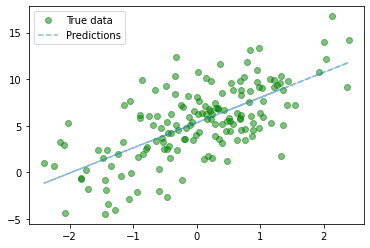

In [174]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

(0.0, 100.0)

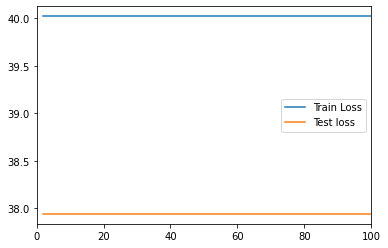

In [175]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

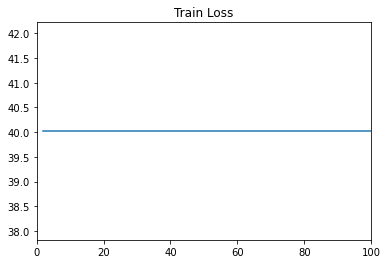

In [176]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

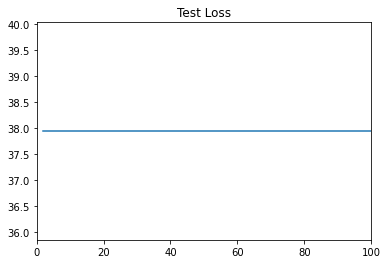

In [177]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)

[]